In [1]:
"""
Notes: 

Node and edge constraints: https://github.com/aplbrain/dotmotif/wiki/Attributes

Ex of Edge constraint
A -> B [weight <= 20, weight >= 10, weight != 12]

Node constraint: 
A -> B [weight >= 0.6]
A.type = "Glu"
B.type = "ACh"

"""

'\nNotes: \n\nNode and edge constraints: https://github.com/aplbrain/dotmotif/wiki/Attributes\n\nEx of Edge constraint\nA -> B [weight <= 20, weight >= 10, weight != 12]\n\nNode constraint: \nA -> B [weight >= 0.6]\nA.type = "Glu"\nB.type = "ACh"\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-07-05 16:57:57,698 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-05 16:57:57,703 - settings - Setting database.user to celiib
INFO - 2021-07-05 16:57:57,703 - settings - Setting database.password to newceliipass
INFO - 2021-07-05 16:57:57,704 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-05 16:57:57,704 - settings - Setting database.user to celiib
INFO - 2021-07-05 16:57:57,705 - settings - Setting database.password to newceliipass
INFO - 2021-07-05 16:57:57,731 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-07-05 16:57:58,233 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-05 16:57:58,348 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-05 16:57:58,349 - settings - Setting database.user to celiib
INFO - 2021-07-05 16:57:58,350 - settings - Setting database.password to newceliipass
INFO - 2021-07-05 16:57:58,351 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-05 16:57:58,889 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-05 16:57:58,924 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-05 16:57:58,927 - settings - Setting database.user to celiib
INFO - 2021-07-05 16:57:58,930 - settings - Setting database.password to newceliipass
INFO - 2021-07-05 16:57:58,930 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-05 16:57:58,930 - settings - Setting database.user to celiib
INFO - 2021-07-05 16:57:58,931 - settings - Setting database.pa

In [4]:
import dotmotif
from dotmotif import Motif, GrandIsoExecutor, NetworkXExecutor

In [5]:
dotmotif.__version__

'0.9.0'

In [6]:
import grandiso
import pkg_resources
pkg_resources.get_distribution('grandiso').version

'0.1.0'

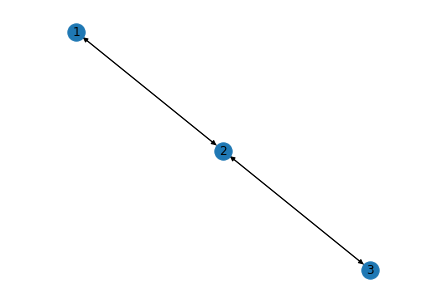

In [7]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([[1,2],[2,3]])
G = nx.DiGraph(G)
nx.draw(G,with_labels=True)

In [8]:
import networkx_utils as xu

In [9]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([[1,2],[2,3]])
G = nx.DiGraph(G)
nx.draw(G,with_labels=True)
xu.set_node_attributes_dict(G,{2:dict(flavor="apple"),3:dict(flavor = "banana")})

import dotmotif_utils as dmu
dmu.n_graph_matches(G,motif)

In [22]:
G = nx.DiGraph(G)

In [23]:
G.nodes[2]

{'flavor': 'apple'}

1

In [ ]:
# from dotmotif.ingest import EdgelistConverter
# graph = EdgelistConverter(
#     "https://zenodo.org/record/3710459/files/soma_subgraph_synapses_spines_v185.csv?download=1",
#     "pre_root_id",
#     "post_root_id",
# ).to_graph()

In [18]:
motif = Motif("""
u -> d1
d1 -> d2
u.flavor =  "banana"
""")

In [19]:
E = NetworkXExecutor(graph=G)

In [20]:
results = E.find(motif)
print(len(results))

1


In [21]:
results

[{'u': 3, 'd1': 2, 'd2': 1}]